### 비슷한 GDP, GDP 성장률을 가진 국가끼리 모아보자

### - Merge GDP & GDP Growth


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

os.chdir(r"C:\\Users\\USER\\Desktop\\Data")

In [2]:
gdp_2020 =  pd.read_csv("gdp_2020.csv") # 경제 지표 GDP 제거 [1]

gdp_2020

,Country Name,GDP_2020
0,Aruba,NaN
1,Afghanistan,19.81
2,Angola,62.31
3,Albania,14.80
4,Andorra,NaN
...,...,...
217,Kosovo,7.61
218,Yemen,NaN
219,South Africa,301.92
220,Zambia,19.32


In [3]:
gdp_growth_2020 = pd.read_csv("gdp_growth_2020.csv")

gdp_growth_2020

,Country Name,2020
0,Aruba,NaN
1,Africa Eastern and Southern,-3.58
2,Afghanistan,-1.93
3,Africa Western and Central,-0.98
4,Angola,-4.04
...,...,...
261,Kosovo,-6.89
262,"Yemen, Rep.",NaN
263,South Africa,-6.96
264,Zambia,-3.02


In [4]:
# 컬럼 명 변경
gdp_2020.rename(columns = {'2020':'GDP_2020'}, inplace = True)
gdp_growth_2020.rename(columns = {'2020':'GDP_Growth_2020'}, inplace = True)

In [5]:
## 데이터 결합
new_data = pd.merge(gdp_growth_2020, gdp_2020, how ='left', left_on='Country Name', right_on='Country Name')

new_data

,Country Name,GDP_Growth_2020,GDP_2020
0,Aruba,NaN,NaN
1,Africa Eastern and Southern,-3.58,NaN
2,Afghanistan,-1.93,19.81
3,Africa Western and Central,-0.98,NaN
4,Angola,-4.04,62.31
...,...,...,...
261,Kosovo,-6.89,7.61
262,"Yemen, Rep.",NaN,NaN
263,South Africa,-6.96,301.92
264,Zambia,-3.02,19.32


### - 시각화

In [6]:
# new_data에 대한 plot을 그려보자

X = new_data.iloc[:,[1,2]].values 
m = X.shape[0]  # 집합의 갯수 (266)
n = X.shape[1] # 특징의 개수 (2가지)

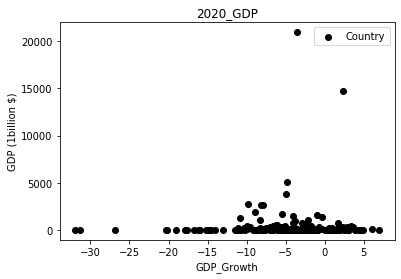

In [7]:
plt.scatter(X[:,0],X[:,1],c='black',label='Country')
plt.xlabel('GDP_Growth')
plt.ylabel('GDP (1billion $)')
plt.legend()
plt.title('2020_GDP')
plt.show()

In [8]:
new_data[new_data['Country Name'] =='United States']

,Country Name,GDP_Growth_2020,GDP_2020
251,United States,-3.49,20936.6


#### - Trouble Shooting

위의 데이터에서 GDP가 80000 이상인 국가 및 도시가 발견되었다. GDP Analysis [1]에서 살펴봤듯 GDP 1위 국가는 미국으로 GDP가 20000이므로 무언가 이상한 데이터가 포함되었다는 것을 확인함 [1]

In [9]:
new_data[new_data["GDP_2020"] >= 10000]

,Country Name,GDP_Growth_2020,GDP_2020
40,China,2.30,14722.73
251,United States,-3.49,20936.60


위와 같이 다른 경제 지표도 포함되어 있는 것을 확인.

위 분석의 목적은 국가 및 도시를 대상으로 분석을 진행하는 것이기 때문에 gdp_2020.csv 파일에서 직접 제거함

In [10]:
count= new_data.isna().sum()

In [11]:
count

Country Name        0
GDP_Growth_2020    39
GDP_2020           86
dtype: int64

In [12]:
## Nan값은 제외
new_data = new_data.dropna(axis=0)

In [13]:
# new_data에 대한 plot을 그려보자

X = new_data.iloc[:,[1,2]].values 
m = X.shape[0]  # 집합의 갯수 (266)
n = X.shape[1] # 특징의 개수 (2가지)

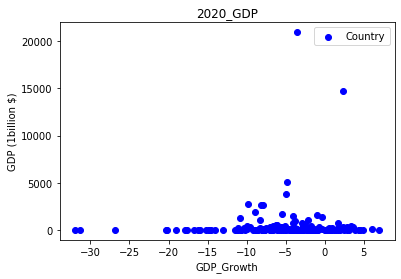

In [14]:
plt.scatter(X[:,0],X[:,1],c='blue',label='Country')
plt.xlabel('GDP_Growth')
plt.ylabel('GDP (1billion $)')
plt.legend()
plt.title('2020_GDP')
plt.show()

미국과 중국의 GDP가 다른 국가에 비해 너무 크므로 제외함

In [15]:
# 미국 제외
new_data = new_data[new_data['Country Name'] !='United States']
# 중국 제외
new_data = new_data[new_data['Country Name'] !='China']

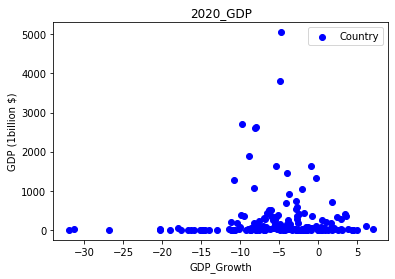

In [16]:
X = new_data.iloc[:,[1,2]].values 
m = X.shape[0]  # 집합의 갯수 (266)
n = X.shape[1] # 특징의 개수 (2가지)

plt.scatter(X[:,0],X[:,1],c='blue',label='Country')
plt.xlabel('GDP_Growth')
plt.ylabel('GDP (1billion $)')
plt.legend()
plt.title('2020_GDP')
plt.show()

위 plot을 통해 GDP가 큰 나라들도 마이너스 GDP 성장을 한 것을 알 수 있으며 GDP와 GDP Growth간의 상관관계도 딱히 보이지 않는 것을 볼 수 있다.

### KMeans Cluster 알고리즘
#### 1. 클러스터 수 (k)를 정하기


In [17]:
import random as rd

k = 4  # 4개의 클러스터

#### 2. 반복 수 정하기

In [18]:
n_iter = 100

#### 3. 클러스터 중심값을 저장하기 위한 2차원 배열 생성

In [19]:
Centroids=np.array([]).reshape(n,0) # 클러스터 중심 초기화
Centroids # shape=(2, 0)  # 특징의 수

for i in range(k): # 0, 1, 2, 3, 4   # 군집의 수
    rand=rd.randint(0,m-1) # 0과 266 사이 난수 생성
    Centroids=np.c_[Centroids,X[rand]] # 클러스터 중심(열) 추가

Centroids # K개 클러스터 중심 초기값. shape=(4, 266)

array([[ -6.16,  -7.83,   1.5 ,  -4.75],
       [ 15.89,  21.53,  13.68, 104.57]])

#### 4. 데이터와 클러스터 중심간의 유클리드 거리 계산하기

In [20]:
# 이를 위해 계산 값을 저장할 배열을 아래와 같이 생성
euclid_dist = np.array([]).reshape(m,0)

euclid_dist

array([], shape=(177, 0), dtype=float64)

In [21]:
# numpy의 broadcast를 사용하여 shape가 다른 배열을 계산
temp_dist = np.sum((X-Centroids[:,0])**2, axis=1)

temp_dist

array([3.32593000e+01, 2.15931080e+03, 9.31060000e+00, 1.34835215e+05,
       1.25712000e+01, 3.05617000e+02, 1.72928587e+06, 1.70635271e+05,
       7.17380900e+02, 2.01248500e+02, 2.49440328e+05, 1.00257700e+02,
       6.91028000e+01, 9.51526541e+04, 2.83640850e+03, 1.23944000e+02,
       1.85589000e+01, 1.99636450e+03, 2.61751300e+02, 4.35395600e+02,
       2.04158816e+06, 2.63812900e+02, 6.91465000e+01, 1.82082500e+02,
       3.00500000e+00, 2.22633700e+02, 2.64882193e+06, 5.35951951e+05,
       5.61928546e+04, 2.13029200e+03, 6.19160200e+02, 1.20266530e+03,
       2.83042000e+01, 6.52602877e+04, 3.37753800e+02, 2.75660500e+02,
       2.08472130e+03, 2.76274980e+03, 6.36917000e+01, 5.18202832e+04,
       1.43653902e+07, 2.00855700e+02, 3.49078900e+02, 1.15129469e+05,
       3.96301610e+03, 1.67111953e+04, 6.87825450e+03, 1.20628625e+05,
       1.60103130e+06, 2.39652500e+02, 8.56922600e+03, 6.52100077e+04,
       2.98632200e+02, 6.69314195e+06, 2.35156000e+01, 7.24606960e+06,
      

In [22]:
# 유클리드 거리 배열은 (264,1)이 됨
np.c_[euclid_dist, temp_dist]

array([[3.32593000e+01],
       [2.15931080e+03],
       [9.31060000e+00],
       [1.34835215e+05],
       [1.25712000e+01],
       [3.05617000e+02],
       [1.72928587e+06],
       [1.70635271e+05],
       [7.17380900e+02],
       [2.01248500e+02],
       [2.49440328e+05],
       [1.00257700e+02],
       [6.91028000e+01],
       [9.51526541e+04],
       [2.83640850e+03],
       [1.23944000e+02],
       [1.85589000e+01],
       [1.99636450e+03],
       [2.61751300e+02],
       [4.35395600e+02],
       [2.04158816e+06],
       [2.63812900e+02],
       [6.91465000e+01],
       [1.82082500e+02],
       [3.00500000e+00],
       [2.22633700e+02],
       [2.64882193e+06],
       [5.35951951e+05],
       [5.61928546e+04],
       [2.13029200e+03],
       [6.19160200e+02],
       [1.20266530e+03],
       [2.83042000e+01],
       [6.52602877e+04],
       [3.37753800e+02],
       [2.75660500e+02],
       [2.08472130e+03],
       [2.76274980e+03],
       [6.36917000e+01],
       [5.18202832e+04],


In [23]:
for i in range(n_iter): # n_iter 반복 횟수
    # 유클리드 거리가 최소가 되는 K 클러스터 할당
    euclid_dist=np.array([]).reshape(m,0)
    for i in range(k):
        temp_dist=np.sum((X-Centroids[:,i])**2,axis=1) 
        euclid_dist=np.c_[euclid_dist,temp_dist]
    min_c =np.argmin(euclid_dist,axis=1)+1 
    # K 클러스터 갱신
    Y={}
    for j in range(k):
        Y[j+1]=np.array([]).reshape(2,0) # Y 딕셔너리 키, 값 할당
    for i in range(m):
        Y[min_c[i]]=np.c_[Y[min_c[i]],X[i]] # Y 딕셔너리 키(K클러스터), 값(GDP, GDP_growth) 할당
    for j in range(k):
        Y[j+1]=Y[j+1].T # 전치행렬
    for j in range(k):
        Centroids[:,j]=np.mean(Y[j+1],axis=0) # K 클러스터 중심 갱신
    Output=Y

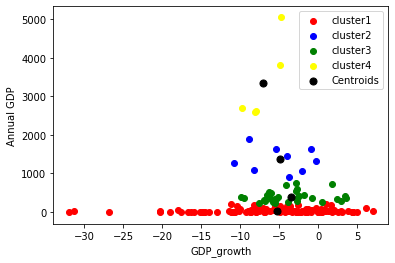

In [24]:
# K-평균 클러스터링 결과 가시화
color=['red','blue','green','yellow']
labels=['cluster1','cluster2','cluster3', 'cluster4']
for i in range(k):
    plt.scatter(Output[i+1][:,0],Output[i+1][:,1],c=color[i],label=labels[i])
plt.scatter(Centroids[0,:],Centroids[1,:],s=50,c='black',label='Centroids')
plt.xlabel('GDP_growth')
plt.ylabel('Annual GDP')
plt.legend()
plt.show()

In [25]:
cluster = pd.Series(min_c)

cluster

0      1
1      1
2      1
3      3
4      1
      ..
172    1
173    1
174    3
175    1
176    1
Length: 177, dtype: int64

In [26]:
# 위 cluster를 new_data과 결합하기
cluster = np.c_[new_data, cluster]

df_cluster = pd.DataFrame(cluster)

In [27]:
# 칼럼 명 지정
df_cluster.columns = ('Country','GDP_Growth','2020_GDP','Cluster')

df_cluster

,Country,GDP_Growth,2020_GDP,Cluster
0,Afghanistan,-1.93,19.81,1
1,Angola,-4.04,62.31,1
2,Albania,-3.31,14.80,1
3,Argentina,-9.91,383.07,3
4,Armenia,-7.60,12.65,1
...,...,...,...,...
172,Samoa,-2.74,0.81,1
173,Kosovo,-6.89,7.61,1
174,South Africa,-6.96,301.92,3
175,Zambia,-3.02,19.32,1


### - Cluster 별 국가 확인하기

#### 1. Cluster = 1인 국가 목록

In [33]:
df_cluster.loc[df_cluster['Cluster'] == 1]

,Country,GDP_Growth,2020_GDP,Cluster
0,Afghanistan,-1.93,19.81,1
1,Angola,-4.04,62.31,1
2,Albania,-3.31,14.80,1
4,Armenia,-7.60,12.65,1
5,Antigua and Barbuda,-15.97,1.42,1
...,...,...,...,...
171,Vanuatu,-9.24,0.85,1
172,Samoa,-2.74,0.81,1
173,Kosovo,-6.89,7.61,1
175,Zambia,-3.02,19.32,1


#### 2. Cluster가 3인 국가 목록

In [29]:
df_cluster.loc[df_cluster['Cluster'] == 3]

,Country,GDP_Growth,2020_GDP,Cluster
3,Argentina,-9.91,383.07,3
7,Austria,-6.59,428.97,3
10,Belgium,-6.28,515.33,3
13,Bangladesh,2.38,324.24,3
27,Switzerland,-2.87,747.97,3
28,Chile,-5.77,252.94,3
33,Colombia,-6.85,271.35,3
39,Czech Republic,-5.60,243.53,3
43,Denmark,-2.73,355.18,3
47,"Egypt, Arab Rep.",3.57,363.07,3


#### 3. Cluster가 2인 국가 목록

In [34]:
df_cluster.loc[df_cluster['Cluster'] == 2]

,Country,GDP_Growth,2020_GDP,Cluster
6,Australia,-0.28,1330.90,2
20,Brazil,-4.06,1444.73,2
26,Canada,-5.40,1643.41,2
48,Spain,-10.84,1281.20,2
71,Indonesia,-2.07,1058.42,2
78,Italy,-8.87,1886.45,2
88,South Korea,-0.96,1630.53,2
103,Mexico,-8.24,1076.16,2
119,Netherlands,-3.74,912.24,2


#### 4. Cluster가 4인 국가 목록

In [35]:
df_cluster.loc[df_cluster['Cluster'] == 4]

,Country,GDP_Growth,2020_GDP,Cluster
40,Germany,-4.90,3806.06,4
53,France,-8.11,2603.00,4
55,United Kingdom,-9.79,2707.74,4
72,India,-7.96,2622.98,4
81,Japan,-4.80,5048.69,4


#### - 요약

위 plot를 보면 GDP 값이 큰 순서대로 cluster를 나열하면 4 > 2 > 3 > 1 순으로 나타낼 수 있다. (프로그램 실행마다 cluster 순서는 변동됨)

각 클러스터링의 특징으로

#### 1.  cluster = 1인 국가

대다수의 국가 및 도시가 cluster 2에 포함되어 있으며 GDP 값이 100 (1billion$) 이하인 국가로 보인다.

#### 2.  cluster = 3인 국가

GDP 값이 200에서 700 사이의 국가들로 구성되어 있다.

#### 3. cluster = 2인 국가

GDP 값이 1000이상인 국가들로 구성되며 한국 역시 클러스터 2에 포함되며 클러스터 2인 국가들 모두 2020년도 마이너스 GDP 성장을 했다.

#### 4. cluster = 4인 국가

GDP 값이 너무 커서 제외했던 미국과 중국을 역시 Cluster 4에 포함되며 경제 대국들이 클러스터 4에 포함된 것을 알 수 있다.

In [32]:
# save csv
df_cluster.to_csv("gdp_cluster.csv")

### Reference

https://blog.daum.net/geoscience/1515 - K-Means Cluster